In [1]:
## Machine Learning Project 

# Install Packages 


# EDA

In [46]:
#for EDA
import pandas as pd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

# for machine learning  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [12]:
# read in dataset
df = pd.read_csv("healthcare_dataset.csv")

df # high level overview of the dataset

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [14]:
# looking at the data types
df.dtypes
df.info()

# checking for missing variables 
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [50]:
# Function to hash sensitive information and truncate to 5 characters
def hash_and_truncate(info):
    # Encode the input string to bytes
    info_bytes = info.encode('utf-8')
    # Apply SHA-256 hashing
    hashed_info = hashlib.sha256(info_bytes).hexdigest()
    # Truncate the hashed value to 5 characters
    truncated_hash = hashed_info[:5]
    return truncated_hash

# Anonymize sensitive columns using truncated cryptographic hashing
df["Name"] = df["Name"].apply(lambda x: hash_and_truncate(x) if isinstance(x, str) else x)
df["Doctor"] = df["Doctor"].apply(lambda x: hash_and_truncate(x) if isinstance(x, str) else x)
df["Hospital"] = df["Hospital"].apply(lambda x: hash_and_truncate(x) if isinstance(x, str) else x)
df["Insurance Provider"] = df["Insurance Provider"].apply(lambda x: hash_and_truncate(x) if isinstance(x, str) else x)

# Display anonymized dataframe
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Hospital Stay Duration
0,89dfc,81,Female,O-,Diabetes,2022-11-17,691c3,a616a,9269e,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14
1,e2cf6,35,Male,O+,Asthma,2023-06-01,e742b,4c1b5,a19b0,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14
2,506c1,61,Male,B-,Obesity,2019-01-09,eac86,0a094,9269e,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30
3,06dd3,49,Male,B-,Asthma,2020-05-02,54ed6,08b34,9269e,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1
4,b1050,51,Male,O-,Arthritis,2021-07-09,06bdb,33082,a19b0,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24


In [49]:
# insights into  the data 
df['Medical Condition'].value_counts() 
df['Admission Type'].value_counts()
df['Medication'].value_counts()
df['Gender'].value_counts()
df['Test Results'].value_counts()

Abnormal        3456
Inconclusive    3277
Normal          3267
Name: Test Results, dtype: int64

## Insight into Duration of Stay

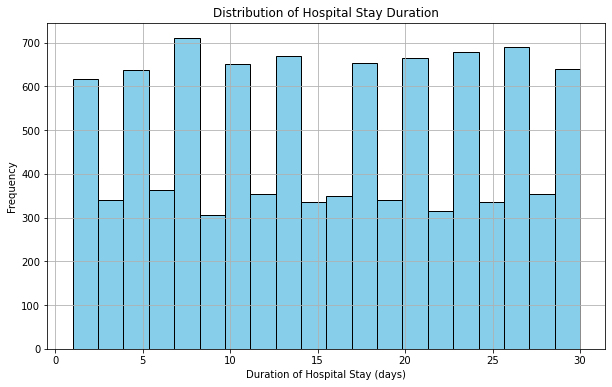

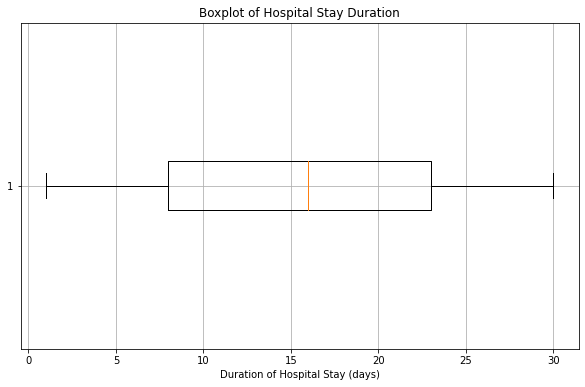

In [44]:
# Convert date features to datetime format
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"])

# Calculate duration of hospital stay
df["Hospital Stay Duration"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

# Histogram of hospital stay duration
plt.figure(figsize=(10, 6))
plt.hist(df["Hospital Stay Duration"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Hospital Stay Duration")
plt.xlabel("Duration of Hospital Stay (days)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Boxplot of hospital stay duration
plt.figure(figsize=(10, 6))
plt.boxplot(df["Hospital Stay Duration"], vert=False)
plt.title("Boxplot of Hospital Stay Duration")
plt.xlabel("Duration of Hospital Stay (days)")
plt.grid(True)
plt.show()



In [5]:
# Load the dataset
data = pd.read_csv("healthcare_dataset.csv")

# Separate features (X) and target variable (y)
X = data.drop(columns=["Name", "Billing Amount"])
y = data["Discharge Date"]

# Convert date features to datetime format
X["Date of Admission"] = pd.to_datetime(X["Date of Admission"])
X["Discharge Date"] = pd.to_datetime(X["Discharge Date"])

# Convert datetime features to Unix timestamps
X["Date of Admission"] = X["Date of Admission"].apply(lambda x: x.timestamp())
X["Discharge Date"] = X["Discharge Date"].apply(lambda x: x.timestamp())



In [7]:
# Split the data into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert date strings to datetime format:
y_train = pd.to_datetime(y_train).apply(lambda x: x.timestamp())
y_test = pd.to_datetime(y_test).apply(lambda x: x.timestamp())

# Prepare for the Preprocessor:
numeric_features = ["Age", "Date of Admission", "Discharge Date"]
categorical_features = ["Gender", "Blood Type", "Medical Condition", "Doctor", "Hospital", "Insurance Provider", "Admission Type", "Room Number", "Medication", "Test Results"]


In [8]:
# Set up transformers and preprocessor

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])